In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

### calculate overall rest ratio

In [3]:
os.chdir("..")

In [5]:
AUG_DIR_PATH = "preprocessed_dataset/augmentation_v2/"
total_frame = 0
total_rest = 0
rest_ratio = {}

for file_name in sorted(os.listdir(AUG_DIR_PATH)):
    if not file_name.endswith(".ans.npy"):
        continue
    print(file_name)
    ground_bass = np.load(AUG_DIR_PATH + file_name)[:,52]
    rest_frame = np.sum(ground_bass)
    total_frame += ground_bass.shape[0]
    total_rest += rest_frame
    rest_ratio.update({AUG_DIR_PATH + file_name: rest_frame/ground_bass.shape[0]})
print(total_frame, total_rest)
print(total_rest/total_frame)

2ndMovementOfSinisterFootwear_d1.mid.ans.npy
2ndMovementOfSinisterFootwear_d2.mid.ans.npy
2ndMovementOfSinisterFootwear_d3.mid.ans.npy
2ndMovementOfSinisterFootwear_o0.mid.ans.npy
2ndMovementOfSinisterFootwear_p1.mid.ans.npy
2ndMovementOfSinisterFootwear_p2.mid.ans.npy
2ndMovementOfSinisterFootwear_p3.mid.ans.npy
2ndMovementOfSinisterFootwear_p4.mid.ans.npy
2ndMovementOfSinisterFootwear_p5.mid.ans.npy
2ndMovementOfSinisterFootwear_p6.mid.ans.npy
4on6_d1.mid.ans.npy
4on6_d2.mid.ans.npy
4on6_d3.mid.ans.npy
4on6_d4.mid.ans.npy
4on6_d5.mid.ans.npy
4on6_o0.mid.ans.npy
4on6_p1.mid.ans.npy
4on6_p2.mid.ans.npy
4on6_p3.mid.ans.npy
4on6_p4.mid.ans.npy
4on6_p5.mid.ans.npy
4on6_p6.mid.ans.npy
55Dive_d1.mid.ans.npy
55Dive_d2.mid.ans.npy
55Dive_d3.mid.ans.npy
55Dive_d4.mid.ans.npy
55Dive_d5.mid.ans.npy
55Dive_o0.mid.ans.npy
55Dive_p1.mid.ans.npy
55Dive_p2.mid.ans.npy
55Dive_p3.mid.ans.npy
55Dive_p4.mid.ans.npy
55Dive_p5.mid.ans.npy
55Dive_p6.mid.ans.npy
5To10_d1.mid.ans.npy
5To10_d2.mid.ans.npy
5To1

### get valid data and calculate ratio

In [7]:
THRESHOLD = 0.2
valid_data = {}
for key, val in rest_ratio.items():
    if val < THRESHOLD:
        valid_data.update({key:val})

In [8]:
print(len(valid_data))
total_frame = 0
total_rest = 0

for key in valid_data.keys():
    print(key)
    ground_bass = np.load(key)[:,52]
    rest_frame = np.sum(ground_bass)
    total_frame += ground_bass.shape[0]
    total_rest += rest_frame
    rest_ratio.update({key: rest_frame/ground_bass.shape[0]})
print(total_frame, total_rest)
print(total_rest/total_frame)

4644
preprocessed_dataset/augmentation_v2/2ndMovementOfSinisterFootwear_d1.mid.ans.npy
preprocessed_dataset/augmentation_v2/2ndMovementOfSinisterFootwear_d2.mid.ans.npy
preprocessed_dataset/augmentation_v2/2ndMovementOfSinisterFootwear_d3.mid.ans.npy
preprocessed_dataset/augmentation_v2/2ndMovementOfSinisterFootwear_o0.mid.ans.npy
preprocessed_dataset/augmentation_v2/2ndMovementOfSinisterFootwear_p1.mid.ans.npy
preprocessed_dataset/augmentation_v2/2ndMovementOfSinisterFootwear_p2.mid.ans.npy
preprocessed_dataset/augmentation_v2/2ndMovementOfSinisterFootwear_p3.mid.ans.npy
preprocessed_dataset/augmentation_v2/2ndMovementOfSinisterFootwear_p4.mid.ans.npy
preprocessed_dataset/augmentation_v2/2ndMovementOfSinisterFootwear_p5.mid.ans.npy
preprocessed_dataset/augmentation_v2/2ndMovementOfSinisterFootwear_p6.mid.ans.npy
preprocessed_dataset/augmentation_v2/4on6_d1.mid.ans.npy
preprocessed_dataset/augmentation_v2/4on6_d2.mid.ans.npy
preprocessed_dataset/augmentation_v2/4on6_d3.mid.ans.npy
prep

In [9]:
with open("data_preprocess/rest_ratio_0p1_v2.pickle", "wb") as f:
    pickle.dump(list(valid_data.keys()), f)

### visualizing bass ground truth

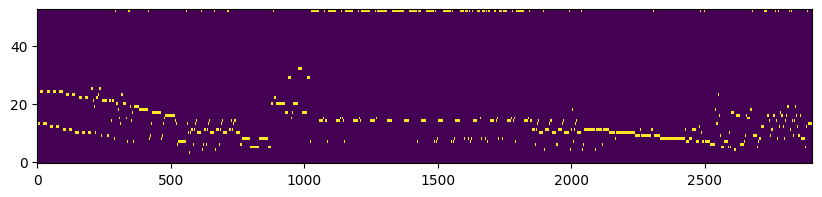

In [19]:
ground = np.load(os.path.join("preprocessed_dataset/augmentation_v2", "2ndMovementOfSinisterFootwear_d1.mid.ans.npy"))[:,:53].T
fig, ax = plt.subplots()
ax.imshow(ground, origin="lower", aspect="auto", interpolation="none")
fig.set_size_inches(10, 2)
# ax.set_yticks(list(range(12)))
# ax.set_yticklabels(["C", "Db", "D", "Eb", "E", "F", "Gb", "G", "Ab", "A", "Bb", "B"])
plt.show()

### put all dense midi to a directory

In [10]:
with open("data_preprocess/rest_ratio_0p1_v2.pickle", "rb") as f:
    dense_midi_list = pickle.load(f)

In [11]:
for p in dense_midi_list:
    os.system(f"cp '{p.replace('.ans', '')}' ./preprocessed_dataset/dense_v2/")
    os.system(f"cp '{p}' ./preprocessed_dataset/dense_v2/")